## Importing Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [50]:
df = pd.read_csv(r"C:\Users\user\Desktop\Elevvo Internship tasks\task 4\train.csv")

In [51]:
sns.set(style="whitegrid")  

## Explore Data

In [52]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [53]:
df.shape

(421570, 5)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [55]:
df.duplicated().sum()

np.int64(0)

## Data Preprocessing

In [56]:
df['Date'] = pd.to_datetime(df['Date']) 

In [57]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [58]:
df = df.sort_values('Date')

In [59]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [60]:
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()

C:\Users\user\AppData\Local\Temp\ipykernel_30440\1236678868.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()


In [61]:
monthly_sales.head()

Date
2010-02-28    1.903330e+08
2010-03-31    1.819198e+08
2010-04-30    2.314124e+08
2010-05-31    1.867109e+08
2010-06-30    1.922462e+08
Freq: ME, Name: Weekly_Sales, dtype: float64

## Overall Trend of Sales

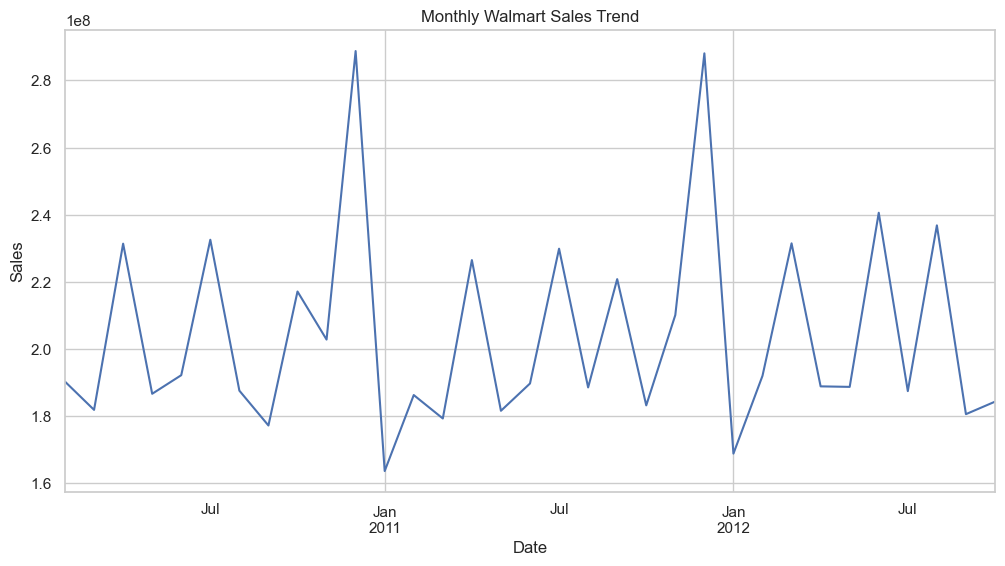

In [62]:
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Walmart Sales Trend")
plt.ylabel("Sales")
plt.show()


## Trend with Moving Averages

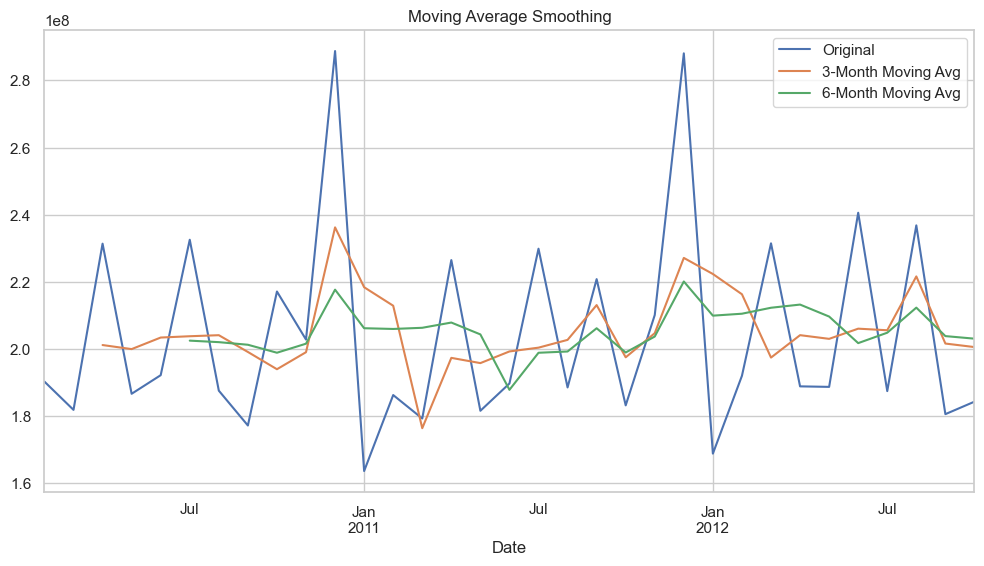

In [63]:
plt.figure(figsize=(12,6))
monthly_sales.plot(label="Original")
monthly_sales.rolling(window=3).mean().plot(label="3-Month Moving Avg")
monthly_sales.rolling(window=6).mean().plot(label="6-Month Moving Avg")
plt.title("Moving Average Smoothing")
plt.legend()
plt.show()


## Seasonality (Average Sales by Month)

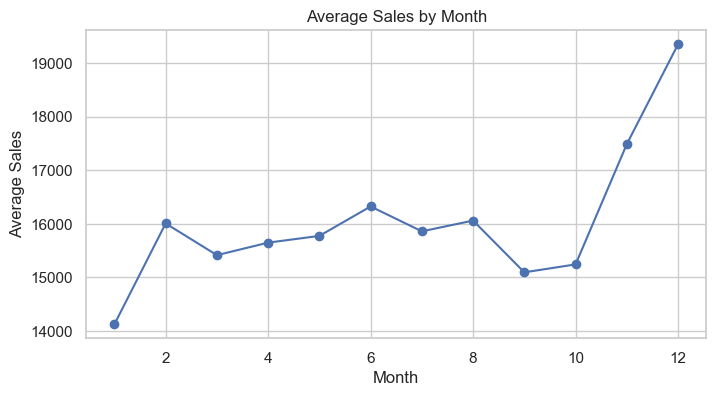

In [64]:
df['Month'] = df['Date'].dt.month
monthly_pattern = df.groupby('Month')['Weekly_Sales'].mean()
plt.figure(figsize=(8,4))
monthly_pattern.plot(marker='o') 
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()

## Sales Breakdown by Department

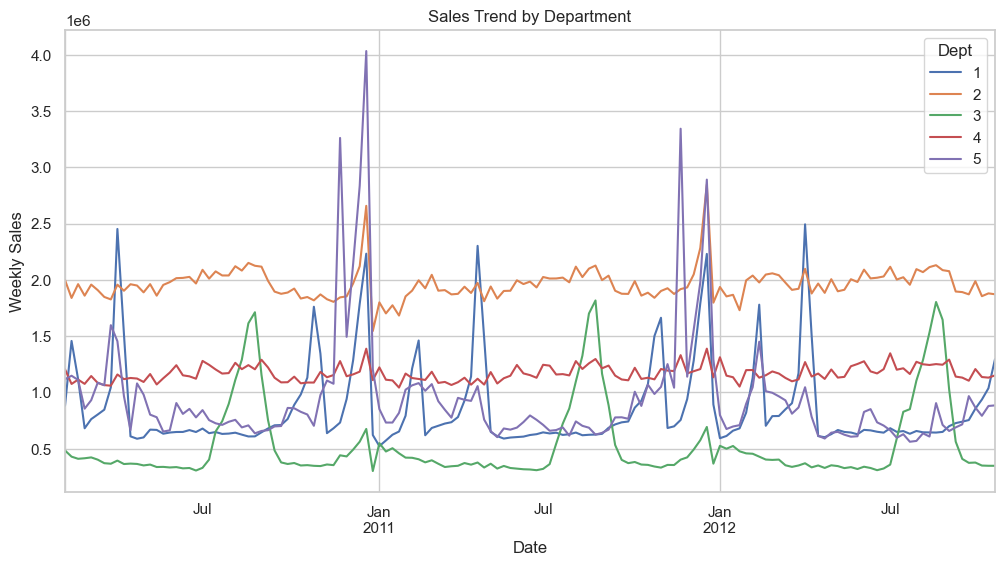

In [65]:
dept_sales = df.groupby(['Date','Dept'])['Weekly_Sales'].sum().unstack()
dept_sales.iloc[:, :5].plot(figsize=(12,6))
plt.title("Sales Trend by Department")
plt.ylabel("Weekly Sales")
plt.show()


## Sales Breakdown by Store

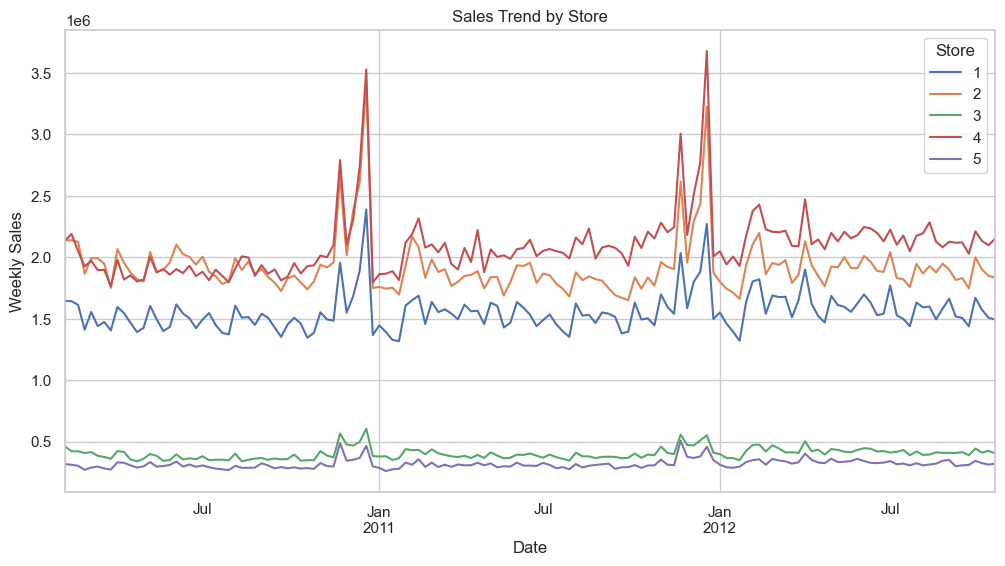

In [66]:
store_sales = df.groupby(['Date','Store'])['Weekly_Sales'].sum().unstack()
store_sales.iloc[:, :5].plot(figsize=(12,6))
plt.title("Sales Trend by Store")
plt.ylabel("Weekly Sales")
plt.show()


## Simple Forecast

C:\Users\user\AppData\Local\Temp\ipykernel_30440\4105107603.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()


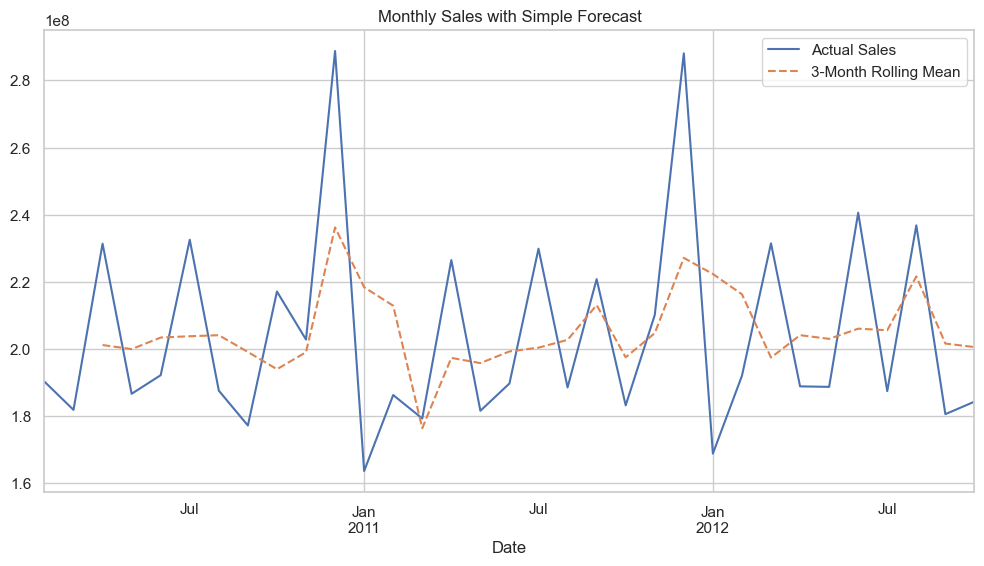

In [67]:
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()
forecast = monthly_sales.rolling(3).mean()
plt.figure(figsize=(12,6))
monthly_sales.plot(label="Actual Sales")
forecast.plot(label="3-Month Rolling Mean", linestyle="--")
plt.title("Monthly Sales with Simple Forecast")
plt.legend()
plt.show()
